# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 1: Using Git and Python for Collaborative Coding in Google Colab*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Dai | Wuran | Dai Wuran, 2024-10-17 | 12 | 25 |
| Member 2: | Fre | Ashal | Fre Ashal, 2024-10-17 | 12 | 25 |
| Member 3: | De-graft | Godwyll | De-graft Godwyll, 2024-10-17 | 12 | 25 |
| Member 4: | Kwadwo | Asare-Menako | Kwadwo Asare-Menako, 2024-10-17 | 12 | 25 |


# **Linear LSE**
### (40 Marks)

### **Curve Fitting**

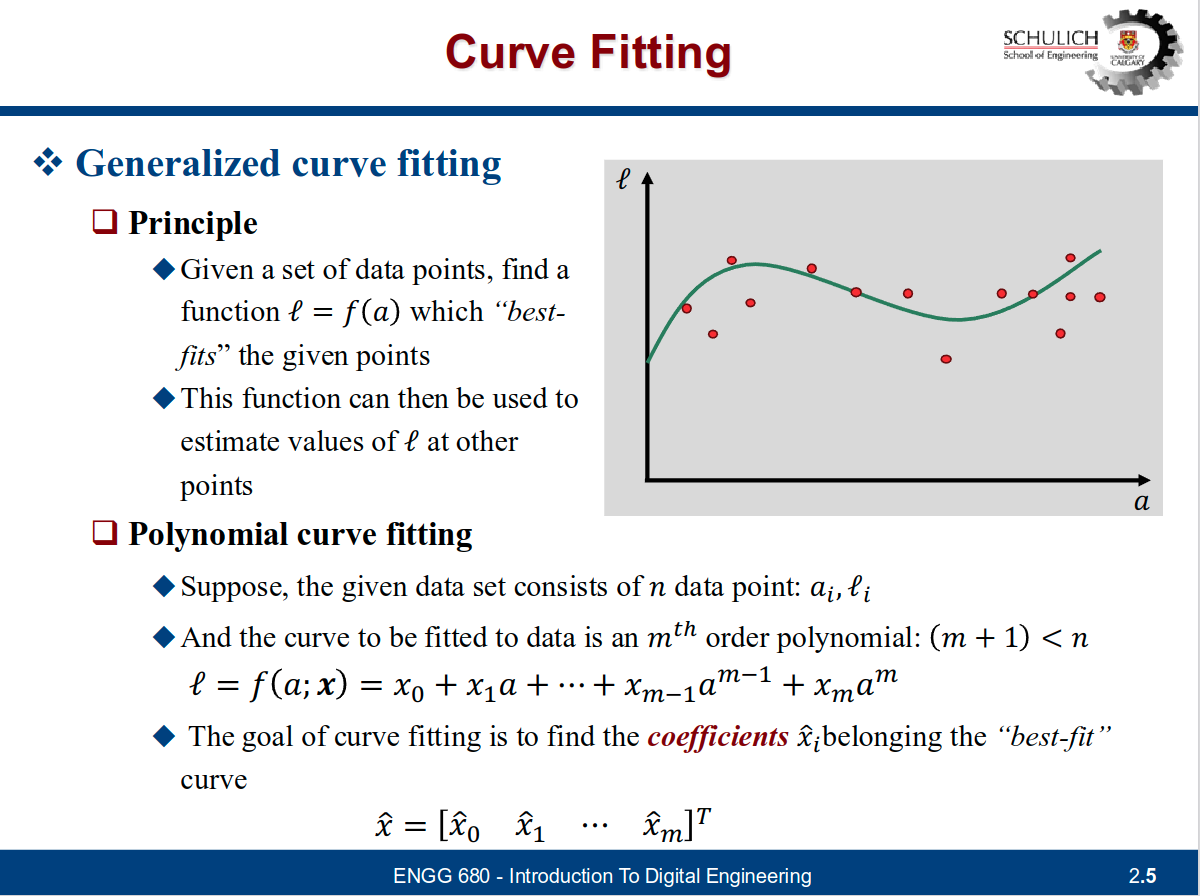

### **Observations:** values of a function f(a) in range of -π to π, contaminated with random noise

### **Unknown States:** coefficients of polynomial functions for curve fitting

In [139]:
# step 1
# import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [140]:
# step 2
# Load data.xlsx file, which contains the observations (with noise), variance of observations and true observations
# hint: use pandas library to parse excel file and use numpy library to convert it to array
# (1 mark)
df_data = pd.read_excel('data.xlsx')
arr_data = df_data.to_numpy()

#store the noisy observations, variance of observations and true observations into numpy arrays seperately
# (1 mark)
l = arr_data[:,0]
l_var = arr_data[:,1]
l_true = arr_data[:,2]

In [141]:
# step 3
# define the number of observation n
# (1 mark)
n = len(l)

# define the observation weight matrix P for LSE as identity matrix
# identity weight matrix simply means the observations will be unweighted in the following LSE
# (1 mark)
P = np.identity(n)

# define the range of function input(i.e., constants a), from start to end; and the numerical array of a
start = -1* np.pi
end = np.pi
a = np.linspace(start, end, n)

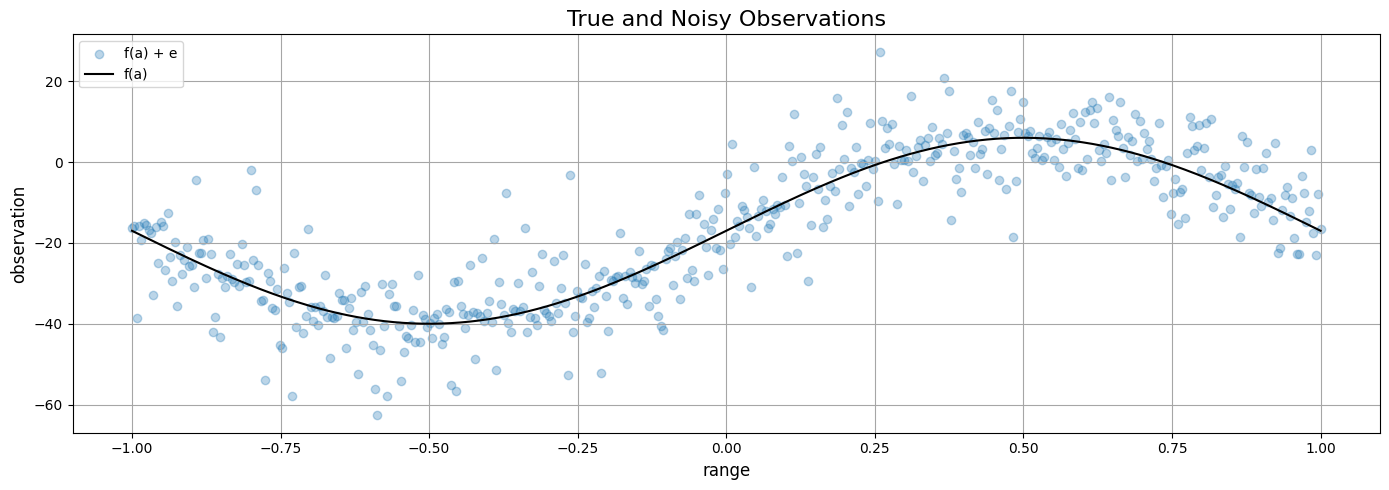

In [142]:
# step 4
# use the matplotlib to plot the true and noisy observations together in one single figure
# use scatter for noisy observation plotting
# for the true observation, label it as "f(a)"" and set color as 'k'
# for the noisy observation scatter plot, label it as "f(a) + e", set color as 'tab:blue', set marker as 'o' and set alpha as 0.3
# include proper axis labels, legend and title
# scale the range of x-axis to be -1 to 1
# keep this format for the rest of the plots in this lab assignment
# (2 marks)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

a_normalized = 2 * (a - np.min(a)) / (np.max(a) - np.min(a)) - 1
ax.scatter(a_normalized, l, label="f(a) + e", color='tab:blue', marker='o', alpha=0.3)
ax.plot(a_normalized, l_true, label="f(a)", color='k')
ax.set_xlabel("range", fontsize=12)
ax.set_ylabel("observation", fontsize=12)
ax.legend(loc='upper left')
ax.set_title("True and Noisy Observations", fontsize=16)

ax.grid(True, which='both',ls='-',color='0.65')
fig.tight_layout()

In [143]:
# step 5
# define a curve fitting function named fit_polynomial_curve
# the function should implement the linear least square estimation
# the function should include all important intermediate steps in LSE
# the input and output of the funciton are described in the comment below in red.
# please keep code clean and well-commented
# (9 marks)

def fit_polynomial_curve(a: np.ndarray, l: np.ndarray, P: np.ndarray, deg: int) -> tuple:
    '''
    Args:
        a:              function input (constants)
        l:              noisy observations
        P:              observation weight matrix
        deg:            degree of polynomial to fit to data
    Returns:
        x:              estimated polynomial coefficients
        cov_x:          uncertainty in estimated coefficients
        apv:            a posterier variance factor (goodness of fit)
        v:              observation residuals
    '''

    # Step 1: Construct design matrix A
    # A is built by stacking powers of a from 0 to deg (constant, linear, quadratic terms, etc.)
    A = np.vander(a, deg+1, increasing=True)  # shape (n, deg+1)

    # Step 2: Linear Least Squares Estimation (LSE)
    # Compute normal equation: (A^T * P * A) * x = A^T * P * l
    At_P_A = A.T @ P @ A  # Matrix multiplication (A^T * P * A), shape (deg+1, deg+1)
    At_P_l = A.T @ P @ l  # Matrix multiplication (A^T * P * l), shape (deg+1, 1)

    # Solve for x (the estimated polynomial coefficients)
    x = np.linalg.solve(At_P_A, At_P_l)  # Solves the normal equation

    # Step 3: Compute residuals
    # Residuals v = l - A*x
    v = l - A @ x  # shape (n, 1)

    # Step 4: Compute the a posteriori variance factor (apv)
    # apv = (v^T * P * v) / (n - m), where n is the number of observations and m is the number of parameters
    n = len(l)  # Number of observations
    m = deg + 1  # Number of estimated parameters (degree + 1)
    apv = (v.T @ P @ v) / (n - m)

    # Step 5: Compute covariance matrix of estimated coefficients
    # cov_x = apv * (At_P_A)^(-1)
    cov_x = apv * np.linalg.inv(At_P_A)  # shape (deg+1, deg+1)


    return (x, cov_x, apv, v)

In [144]:
# step 6
# call the fit_polynomial_curve function and fetch the results
# use polynomial degrees of: 1, 3 ,5
# (1 marks)
# ...

# polynomial degrees of: 1, 3 ,5
degrees = [1,3,5]
results = {}

# call the fit_polynomial_curve function and fetch the results of each degree
for deg in degrees:
    x, cov_x, apv, v = fit_polynomial_curve(a, l, P, deg)

    results[deg] = {
        'coefficients': x,
        'covariance': cov_x,
        'apv': apv,
        'residuals': v
    }
    print(f'--------------------------Polynomial degree: {deg}--------------------------')
    print(f"* Estimated coefficients: {x}")
    print(f"* Covariance matrix of estimated coefficients: {cov_x}")
    print(f"* A posteriori variance factor: {apv}")
    print(f"* Residuals (first 5): {v[:5]}")

--------------------------Polynomial degree: 1--------------------------
* Estimated coefficients: [-16.59352348   7.25633807]
* Covariance matrix of estimated coefficients: [[3.25485217e-01 3.36083382e-17]
 [3.36083382e-17 9.85406897e-02]]
* A posteriori variance factor: 162.742608604322
* Residuals (first 5): [23.1950929  23.36246956  0.51665075 23.34758472 19.66983872]
--------------------------Polynomial degree: 3--------------------------
* Estimated coefficients: [-16.72496774  19.63961372   0.03979476  -2.08281013]
* Covariance matrix of estimated coefficients: [[ 2.97597234e-01  1.25310819e-16 -5.00544889e-02 -1.70673481e-17]
 [ 1.25310819e-16  2.50276449e-01 -2.18317337e-17 -3.53602826e-02]
 [-5.00544889e-02 -2.18317337e-17  1.51540027e-02  3.15360109e-18]
 [-1.70673481e-17 -3.53602826e-02  3.15360109e-18  5.94743723e-03]]
* A posteriori variance factor: 66.13227783131883
* Residuals (first 5): [ -2.74320068  -1.95519951 -24.18660603  -0.74744707  -3.82313043]
----------------

In [145]:
# step 7
# use the estimated coefficients x and constants array a, construct polynomial functions for each degree
# hint: use polyval function from numpy library (check input argument carefully)
# (1 marks)

line_uw = np.polyval(np.flip(results[1]['coefficients']), a)
cubic_uw =  np.polyval(np.flip(results[3]['coefficients']), a)
quintic_uw = np.polyval(np.flip(results[5]['coefficients']), a)

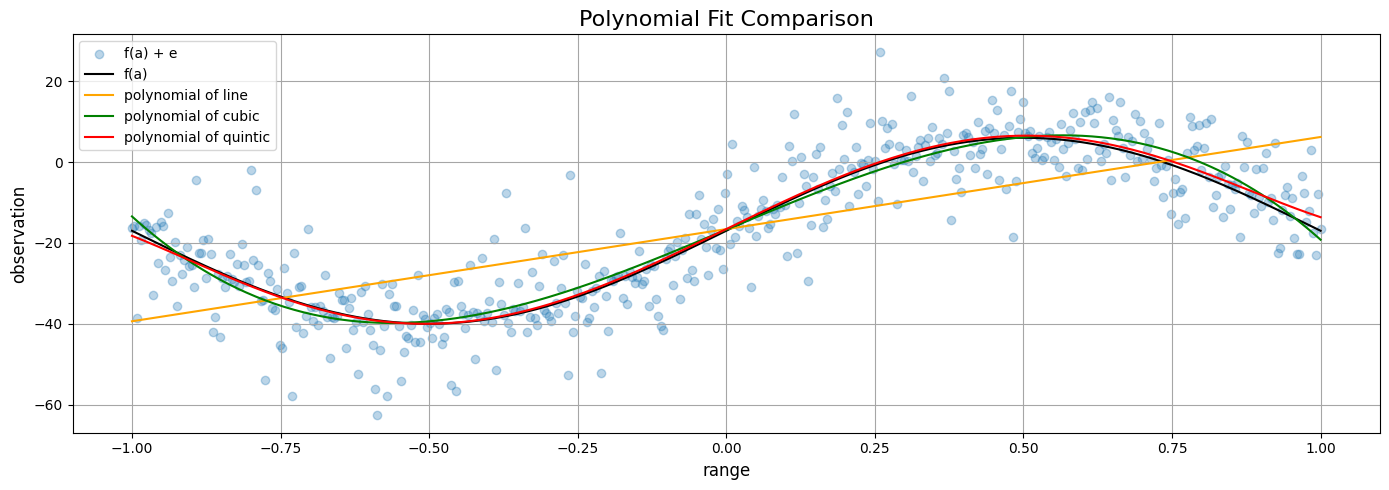

In [146]:
# step 8
# use the matplotlib to plot each polynomial function, noisy observations l, true observations l_true, together in one single figure
# for the polynomials of line, cubic and quintic, use color of orange, green and red respectively.
# (2 marks)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

# Scale the range of a to be [-1,1]
a_normalized = 2 * (a - np.min(a)) / (np.max(a) - np.min(a)) - 1

# Plot true and noisy observations
ax.scatter(a_normalized, l, label="f(a) + e", color='tab:blue', marker='o', alpha=0.3)
ax.plot(a_normalized, l_true, label="f(a)", color='k')

# Plot polynomial functions
ax.plot(a_normalized, line_uw, color='orange', label='polynomial of line')  # Linear polynomial in orange
ax.plot(a_normalized, cubic_uw, color='green', label='polynomial of cubic')  # Cubic polynomial in green
ax.plot(a_normalized, quintic_uw, color='red', label='polynomial of quintic')  # Quintic polynomial in red

# Set axis labels and title
ax.set_xlabel("range", fontsize=12)
ax.set_ylabel("observation", fontsize=12)
ax.set_title('Polynomial Fit Comparison', fontsize=16)

# Set legend
ax.legend(loc='upper left')

ax.grid(True, which='both',ls='-',color='0.65')

fig.tight_layout()

In [147]:
# step 9
# print the a posterier variance factor for each polynomial function
# (3 marks)
# ...
print('A Posterier Variance Factor for Each Polynomial Function:')
for deg, result in results.items():
    print(f"Polynomial Degree {deg}: {result['apv']}")

A Posterier Variance Factor for Each Polynomial Function:
Polynomial Degree 1: 162.742608604322
Polynomial Degree 3: 66.13227783131883
Polynomial Degree 5: 63.7583446301842


In [148]:
# step 10
# compute and print the norm between the predicted observations (output from each polynomial function) and the true observations
# (3 marks)
# ...
for deg, result in results.items():
    A = np.vander(a, deg+1, increasing=True)  # shape (n, deg+1)
    x = result['coefficients']
    v = l_true - A @ x
    print(f"L2-Norm for Polynomial Degree {deg}: {np.linalg.norm(v)}")

L2-Norm for Polynomial Degree 1: 229.0601679674409
L2-Norm for Polynomial Degree 3: 38.285979929116664
L2-Norm for Polynomial Degree 5: 17.36996719696645


In [ ]:
# step 11
# comment on the results of a posterier variance factor and norm, what pattern do you observe
# (2 marks)
# ...
"""
a) The apv measures the fit of the model relative to the expected noise. Key insights include:
• APV ≈ 1: If the apv is close to 1, it indicates a good fit where the observed errors match the
expected noise level in the model.
• APV > 1: If apv is greater than 1, it suggests that the observed errors are larger than expected,
possibly indicating that the model is not capturing all the data patterns or that there is more
noise in the observations than assumed.
• APV < 1: If apv is less than 1, it may suggest overfitting, where the model fits the data too
tightly, underestimating the noise.

b) The L2-norm is a measure of the overall magnitude of the residuals (errors). It is the Euclidean
norm of the residuals, and the insights are:
• Smaller L2-norm: This indicates that the predicted values are close to the observed values,
meaning the residuals are small and the model fits the data well.
• Larger L2-norm: This indicates that the predicted values deviate significantly from the observed
values, meaning larger residuals and suggesting the model may not be fitting the data well.

c) From the results of three polynomial functions above, we can see that the apv of all degrees is
way greater than 1, which indicates that the models of all degrees are not fitting the data so well
and there is room for improvement.

We can also see that the apv and l2-norm of polynomial degree 5 are the smallest, while of degree 1
are the biggest, which means the model of polynomial degree 5 best fits the data, while degree 1 least.
So we can get the pattern that the apv and l2-norm both decrease as polynomial degree increases, which
indicates that the greater the degree of the polynomial function, the better the model fits.
"""

In [149]:
# step 12
# now, let's define the P matrix with the proper weights of observation
# use the variance of observation l_var, define P matrix
# (1 mark)
P = np.linalg.inv(np.diag(l_var))

A Posterier Variance Factor for Each Polynomial Function:
Polynomial Degree 1: 12.054651233436907
Polynomial Degree 3: 1.1444647026537131
Polynomial Degree 5: 0.9447009043856552
----------------------------------------------------
L2-Norm for Polynomial Degree 1: 230.67760813832942
L2-Norm for Polynomial Degree 3: 36.070266872668
L2-Norm for Polynomial Degree 5: 5.7416069158865
----------------------------------------------------


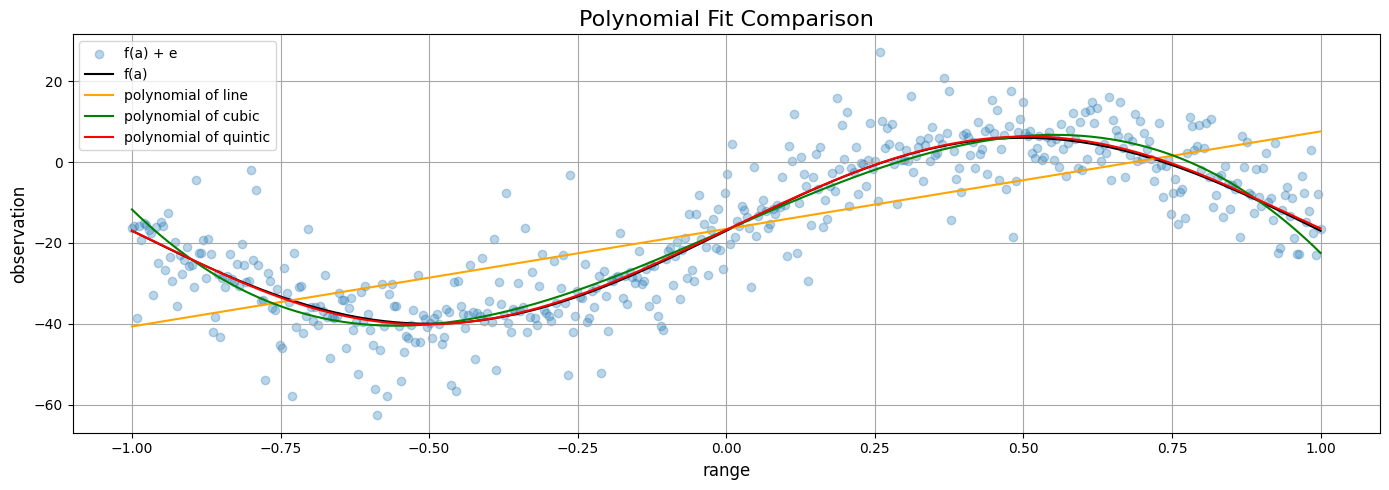

In [150]:
# step 13
# repeat the steps 6-10, using the proper P matrix
# (10 marks)
# ...

# call the fit_polynomial_curve function and fetch the results of each degree
for deg in degrees:
    x, cov_x, apv, v = fit_polynomial_curve(a, l, P, deg)

    results[deg] = {
        'coefficients': x,
        'covariance': cov_x,
        'apv': apv,
        'residuals': v
    }

# use the estimated coefficients x and constants array a, construct polynomial functions for each degree
line_uw = np.polyval(np.flip(results[1]['coefficients']), a)
cubic_uw =  np.polyval(np.flip(results[3]['coefficients']), a)
quintic_uw = np.polyval(np.flip(results[5]['coefficients']), a)

# use the matplotlib to plot each polynomial function, noisy observations l, true observations l_true, together in one single figure
# for the polynomials of line, cubic and quintic, use color of orange, green and red respectively.
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(14, 5))

# Scale the range of a to be [-1,1]
a_normalized = 2 * (a - np.min(a)) / (np.max(a) - np.min(a)) - 1

# Plot true and noisy observations
ax.scatter(a_normalized, l, label="f(a) + e", color='tab:blue', marker='o', alpha=0.3)
ax.plot(a_normalized, l_true, label="f(a)", color='k')

# Plot polynomial functions
ax.plot(a_normalized, line_uw, color='orange', label='polynomial of line')  # Linear polynomial in orange
ax.plot(a_normalized, cubic_uw, color='green', label='polynomial of cubic')  # Cubic polynomial in green
ax.plot(a_normalized, quintic_uw, color='red', label='polynomial of quintic')  # Quintic polynomial in red

# Set axis labels and title
ax.set_xlabel("range", fontsize=12)
ax.set_ylabel("observation", fontsize=12)
ax.set_title('Polynomial Fit Comparison', fontsize=16)

# Set legend
ax.legend(loc='upper left')

ax.grid(True, which='both',ls='-',color='0.65')

fig.tight_layout()

# print the a posterier variance factor for each polynomial function
print('A Posterier Variance Factor for Each Polynomial Function:')
for deg, result in results.items():
    print(f"Polynomial Degree {deg}: {result['apv']}")
print('----------------------------------------------------')

# compute and print the norm between the predicted observations (output from each polynomial function) and the true observations
for deg, result in results.items():
    A = np.vander(a, deg+1, increasing=True)  # shape (n, deg+1)
    x = result['coefficients']
    v = l_true - A @ x
    print(f"L2-Norm for Polynomial Degree {deg}: {np.linalg.norm(v)}")
print('----------------------------------------------------')

In [ ]:
# step 14
# Compare the results of a posterier variance factor and norm from unweighted LSE and weighted LSE, what phenomena do you observe? Explain this phenomena.
# (2 marks)
# ...
"""
From the results above we can see that the L2-norm remains similar in both weighted and unweighted LSE.
Because, the L2-norm is simply the Euclidean norm of the residuals, not considering the weights assigned
to the observations, so it only reflects the overall magnitude of residuals without considering their
individual importance. Thus, even with the introduction of weights, the L2-norm focuses on the overall size
of the residuals, and the differences in how observations are weighted may not affect it significantly.

The apv, however, varies considerably between weighted and unweighted LSE. Because, the apv incorporates
the weighting of the observations, making it highly sensitive to the weights assigned during the fitting
process. In weighted LSE, different weights are assigned to the observations based on their assumed reliability,
affecting how the residuals contribute to the apv calculation. Therefore, the apv can differ significantly
between unweighted and weighted LSE. In conclusion, the apv highlights how well the model fits the data,
particularly for observations that are deemed more reliable.

We can tell from the results above that the apv of weighted LSE is way more smaller than unweighted LSE and
really close to 1, which indicates that the model of weighted LSE fits the data so well compared to unweighted
LSE. However, the l2-norm remians similar in both.
"""

# **Non-linear LSE**
### (35 Marks)

### **SinglePointPositioning**

### **Observations:** Pseudorange [m]

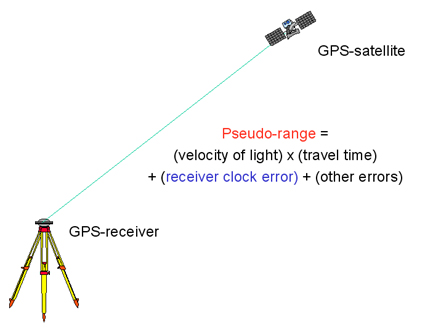

<font size="1.5">Image source: *ICA Course on Toponymy. https://unstats.un.org/unsd/geoinfo/ungegn/docs/_data_icacourses/_HtmlModules/_Selfstudy/S06/S06_05b.html.*</font>

**Pseudorange** is the *pseudo* distance between a satellite and a satellite signal receiver on the ground. In simple words, it contains the geometric range between the satellite and the receiver, with additional associated errors.

The simplified version of the Pseudorange measurement model is:
$$P=\rho-cdT+ϵ_{sum}$$ and
$$\rho=\sqrt{(x_s - x_r)^2 + (y_s - y_r)^2 + (z_s - z_r)^2}$$
where
$$\rho=geometric\ range$$
$${x_s, y_s, z_s, x_r,y_r,z_r} = 3D\ coordinates\ of\ satellite\ and\ receiver$$
$$cdT = receiver\ clock\ offset$$
$$ϵ_{sum}=general\ errors\ term\ (ϵ_{sum}=\Delta \rho + \Delta_{\text{ion}} + \Delta_{\text{trop}} + \epsilon_P + cdt)$$

\\
Note: the 3D **positions of satellites** are given in this assignment.

### **Unknown States:** Position of receiver & receiver clock offset

We use the psuedorange measurements to estimate the receiver's **3-dimensional position** and the **receiver clock offset:** $$X={x_r,y_r,z_r,cdT}$$.

These will be our states of interest, and we are going to estimate them in the following Least Square Estimation.

In [151]:
# step 1
# Load the psuedorange measurements and satellites' positions files, store them in the format of numpy array
# (hint: use pandas library to parse excel files into dataframe first, then convert them to numpy arrays)
# (1 marks)
df_pseudorange = pd.read_excel('pseudoranges.xlsx')
df_sat_pos = pd.read_excel('satellite_position.xlsx')

pseudorange = df_pseudorange.to_numpy()
sat_pos = df_sat_pos.to_numpy()

In [152]:
# step 2
# define the number of measurements n and the number of states m
# (2 mark)
n = len(pseudorange)
m = 4

In [153]:
# step 3
# Given that the variance of observation is 1 (m^2), define the weight matrix P
# (1 marks)
P = np.identity(n)

In [154]:
# step 4
# set the initial states as zeros:
# (1 mark)
x_0 = np.zeros(m)

In [155]:
# step 5
# GroundTruth coordiantes of the receiver
GroundTruth=np.array([-1633489.37967725,	-3651627.18250363,	4952481.61954918])

In [156]:
# step 6
# initialize the corrections array as ones, iteration loop counter i as zero and related arrays
# (2 mark)
delta = np.ones(m)
i = 0
arr_w = []
arr_delta=[]
arr_err_pos = []
arr_i = []
x_hat = x_0.copy()

In [157]:
# step 7
# define a function called euclidean_norm, which computes the geometric distances between satellites and receiver
# the input of the function should be two arrays: receiver_pos and satellite_pos
# the function should return an array of distance between satellites and receiver
# you can either use the numpy function or code the math manually
# (1 marks)
def euclidean_norm(receiver_pos, satellite_pos):
  # Initialize the distance array
  distance = np.zeros(n)
  # computes the geometric distances between each satellite and receiver
  for i in range(n):
        distance[i] = np.sqrt((receiver_pos[0] - satellite_pos[i, 0])**2 +
                                (receiver_pos[1] - satellite_pos[i, 1])**2 +
                                (receiver_pos[2] - satellite_pos[i, 2])**2)
  return distance

In [158]:
# step 8
# define a function named design_matrix which computes the design matrix A of this LSE problem
# the input of this funciton should be: estimated states array, satellites positions array and geometric distance array
# the function should return an two-dimensional array which represents the design matrix A
# (2 marks)
def design_matrix(r_pos, s_pos, rho):

    # Initialize A
    A = np.zeros((n, m))

    # Each line in A
    for i in range(n):
        # Geometric distance between receiver and satellite i
        d = rho[i]
        # Line i
        A[i, 0] = (r_pos[0] - s_pos[i, 0]) / d
        A[i, 1] = (r_pos[1] - s_pos[i, 1]) / d
        A[i, 2] = (r_pos[2] - s_pos[i, 2]) / d
        A[i, 3] = -1

    return A

In [159]:
# step 9
# start the iteration for the LSE (11 marks in total)

# define the convergence criteria for the 'while' loop
# the convergence criteria is that the corrections delta are less than 0.001 (i.e., <0.1 m), for receiver's position x,y,z part
# (1 marks)
convergence_threshold = 0.001

while np.linalg.norm(delta[:3]) >= convergence_threshold:

       # compute the geometri distance between Satellites and receiver, using the euclidean_norm function we just defined
       # (1 marks)
       rho = euclidean_norm(x_hat[:3], sat_pos[:,1:4])

       # compute the design matrix A
       # (1 marks)
       A = design_matrix(x_hat, sat_pos[:,1:4], rho)

       # compute the misclosure array w
       # (1 marks)
       w = pseudorange[:,1] - rho

       # compute the corrections delta
       # (1 marks)
       delta = np.linalg.inv(A.T @ P @ A) @ (A.T @ P @ w)

       # update the states
       # (1 marks)
       x_hat = x_hat + delta


       # compute the position error from using the updated states against groundtruth
       # (1 marks)
       err_pos = x_hat[:3] - GroundTruth


       # update the counter i, (i.e., increament of 1 for each iteration)
       # (1 mark)
       i += 1

       # store the misclosure, delta, position error and counter from each iteration into arrays, we will use them for plotting
       # (1 marks)
       arr_w.append(w)
       arr_delta.append(delta)
       arr_err_pos.append(err_pos)
       arr_i.append(i)




# After convergence, compute the A Posteriori Variance of Unit Weight
# (1 marks)

# v = pseudorange[:,1] - euclidean_norm(x_hat[:3], sat_pos[:,1:4])
v = w - A @ delta
apv = (v.T @ P @ v) / (n - m)

# compute the Covariance matrix of estimated states
# (1 marks)
C_x_hat = apv * np.linalg.inv(A.T @ P @ A)

In [160]:
# step 10
"""
Print:
      {estimated states,
       corrections array,
       estimated measurements residuals,
       A posteriori Variance of Unit Weight,
       Covariance matrix of estimated states,
       number of iterations,
       3-D position errors},

after the LSE convergence to the console.
"""
# (7 marks)
print("Estimated States:")
print(x_hat)
print("\nCorrections Array:")
print(delta)
print("\nEstimated Measurements Residuals:")
print(v)
print("\nA Posteriori Variance of Unit Weight:")
print(apv)
print("\nCovariance Matrix of Estimated States:")
print(C_x_hat)
print("\nNumber of Iterations:")
print(i)
print("\n3-D Position Errors:")
print(err_pos)


Estimated States:
[-1633492.44451686 -3651629.54237943  4952485.43270835 -1266156.46031267]

Corrections Array:
[ 3.22969020e-06  6.39415364e-06 -1.75956594e-05 -6.47201389e+00]

Estimated Measurements Residuals:
[ 0.25997571  0.11117279 -1.09950209 -0.00500054  0.20031684 -1.41815427
 -0.09126721  1.5120914   0.26365487  0.61138618 -0.34467368]

A Posteriori Variance of Unit Weight:
0.8852888550462107

Covariance Matrix of Estimated States:
[[ 0.28298264  0.06167139 -0.07487066  0.06468701]
 [ 0.06167139  0.37666273 -0.51441611  0.32601524]
 [-0.07487066 -0.51441611  1.81094829 -0.9773772 ]
 [ 0.06468701  0.32601524 -0.9773772   0.61904475]]

Number of Iterations:
5

3-D Position Errors:
[-3.06483961 -2.3598758   3.81315917]


In [ ]:
# step 11
# Comment on the computed A Posteriori Variance of Unit Weight value and the Covariance matrix of estimated states
# (2 marks)
"""
We can see that the computed apv of unit weight after convergence is about 0.885, which is pretty close
to 1. This indicates that the unit weight non-linear model is fitting the data so well and there
is likely no outliers.

In covariance matrix of estimated states, diagonal elements represent the variance (i.e., uncertainty)
of each estimated state, while off-diagonal elements represent the covariance between different estimated
states, showing how errors in one estimate might influence in another. From the covariance matrix above,
we can see that, for Zr (Z coordinate of the receiver), it has the biggest variance about 1.811, which shows
that it is the most uncertain estimated state. Some off-diagonal elements are big, such as Cx[2,3] = Cx[3,2]
= -0.9773772, this suggests that, in this model, the uncertainty of Zr (Z coordinate of the receiver)
and cdT (clock offset of the receiver) have the greatest infulence on each other.
"""

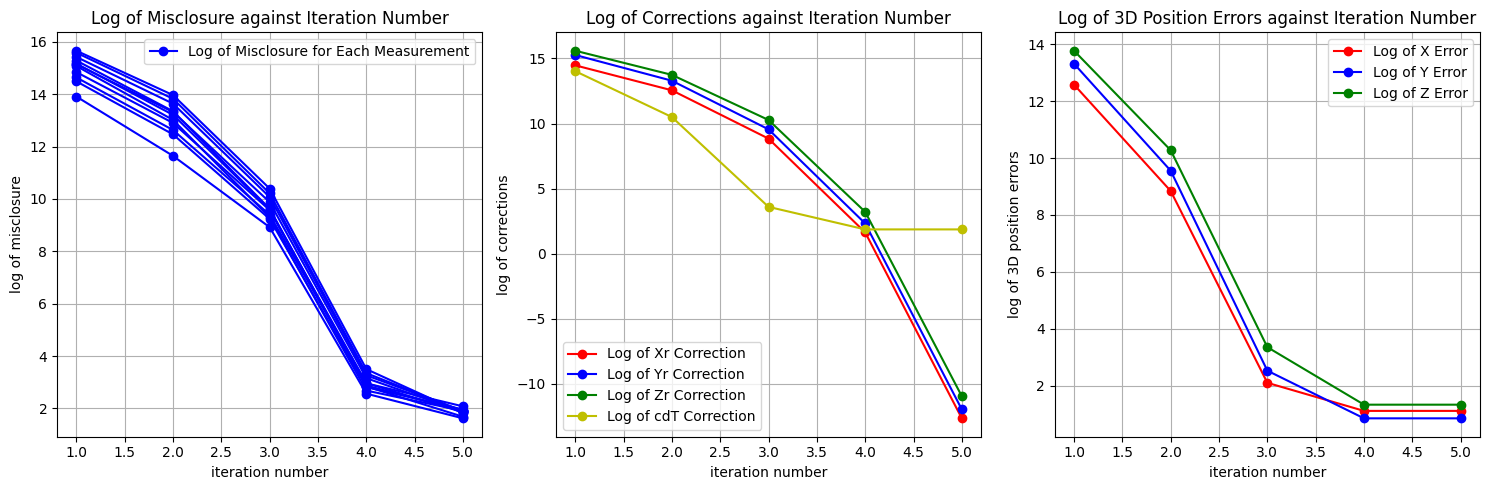

In [162]:
# step 12
# Using the imported matplotlib, plot the following (3 marks in total). Make sure to include proper axes information, legend, grid lines and title.

plt.figure(figsize=(15, 5))

# 1. Plot log of the misclosure w against the LSQ iteration number i
# (1 marks)
log_w = np.log(np.abs(arr_w))


plt.subplot(1, 3, 1)
for i in range(n):
  if i == 0:
    plt.plot(arr_i, log_w[:,i], label='Log of Misclosure for Each Measurement', color='b', marker='o')
  else:
    plt.plot(arr_i, log_w[:,i], color='b', marker='o')
plt.xlabel('iteration number')
plt.ylabel('log of misclosure')
plt.title('Log of Misclosure against Iteration Number')
plt.grid()
plt.legend()

# 2. Plot log of the corrections delta against the LSQ iteration number i
# (1 marks)
log_delta = np.log(np.abs(arr_delta))

plt.subplot(1, 3, 2)
plt.plot(arr_i, log_delta[:,0], label='Log of Xr Correction', color='r', marker='o')
plt.plot(arr_i, log_delta[:,1], label='Log of Yr Correction', color='b', marker='o')
plt.plot(arr_i, log_delta[:,2], label='Log of Zr Correction', color='g', marker='o')
plt.plot(arr_i, log_delta[:,3], label='Log of cdT Correction', color='y', marker='o')
plt.xlabel('iteration number')
plt.ylabel('log of corrections')
plt.title('Log of Corrections against Iteration Number')
plt.grid()
plt.legend()

# 3. Plot log of the 3D position errors against the LSQ iteration number i
# (1 marks)
log_err_pos = np.log(np.abs(arr_err_pos))

plt.subplot(1, 3, 3)
plt.plot(arr_i, log_err_pos[:,0], label='Log of X Error', color='r', marker='o')
plt.plot(arr_i, log_err_pos[:,1], label='Log of Y Error', color='b', marker='o')
plt.plot(arr_i, log_err_pos[:,2], label='Log of Z Error', color='g', marker='o')
plt.xlabel('iteration number')
plt.ylabel('log of 3D position errors')
plt.title('Log of 3D Position Errors against Iteration Number')
plt.grid()
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
# step 13
# Describe the phenomena or pattern you recognize for each plot, and explain such phenomena
# (2 marks)
"""
From the frist graph (left), we can see that the log of the misclosure decreases as the iteration number increases.
Misclosure represents the difference between the observed measurements (pseudoranges) and the computed measurements
based on the estimated states (receiver positions). As iterations progress, the estimated states are refined, leading
to smaller difference between the observed and computed values. This is why the log of misclosure decreases steadily
through iterations, indicating the model is converging towards a solution where the estimates better fit the observations.

From the second graph (middle), the log of the corrections to estimated states also decreases. Corrections represent the
adjustments made to the estimated states at each iteration. Especially for Xr, Yr, and Zr corrections, they decrease steadily
through iterations, while cdT correction remain the same in iteration number 4 and 5. In early iterations, the corrections
are large because the initial estimate is far from the true solution. As the estimation process converges, these corrections
become smaller, indicating that the states are getting closer to the true values.

From the third graph (right), we can see that the log of the 3D position errors decreases as well, but almost remain the same in
iteration number 4 and 5. This reflects that the position estimate is becoming more accurate through iterations.

In conclusion, for all three plots, we can see that the log values decrease steadily with increasing iteration number, showing
reduction in misclosure, corrections, and position errors. This pattern shows that as the process converges, the estimates become
more accurate.
"""

In [ ]:
# this is just for fun (no marks allocated)
# now you can estimated the receiver's position in Earth-center-earth-fixed (ECEF)
# you can use this tool: https://www.oc.nps.edu/oc2902w/coord/llhxyz.htm to convert it to latitude, longitude and height
# and find where is it on google earth!
